# Step 2. Baseline Neural Network Model Performance
## Let’s create a baseline model and result for this project.

### We will start off by importing all of the classes and functions we will need:

In [1]:
import numpy as np
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

/home/hp/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Next, we can initialize the random number generator to ensure that we always get the same results when executing this code. This will help if we are debugging:

In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Now we can load the dataset using pandas and split the columns into 60 input variables (X) and 1 output variable (Y). We use pandas to load the data because it easily handles strings (the output variable), whereas attempting to load the data directly using NumPy would be more difficult.

In [3]:
# load dataset
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# The output variable is string values. We must convert them into integer values 0 and 1.

In [4]:
le = LabelEncoder()
a =  le.fit(Y)
Y = a.transform(Y)

### Let’s start off by defining the function that creates our baseline model. Our model will have a single fully connected hidden layer with the same number of neurons as input variables. This is a good default starting point when creating neural networks.
### The weights are initialized using a small Gaussian random number. The Rectifier activation function is used. The output layer contains a single neuron in order to make predictions. It uses the sigmoid activation function in order to produce a probability output in the range of 0 to 1 that can easily and automatically be converted to crisp class values.
### Finally, we are using the logarithmic loss function (binary_crossentropy) during training, the preferred loss function for binary classification problems. The model also uses the efficient Adam optimization algorithm for gradient. descent and accuracy metrics will be collected when the model is trained.


In [5]:
def create_baseline():
            # create model, write code below
            sonar_model = Sequential()
            sonar_model.add(Dense(30, kernel_initializer='random_uniform',activation='relu', input_dim=60))
            sonar_model.add(Dense(1, activation='sigmoid'))
            # Compile model, write code below
            sonar_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
            return sonar_model

### Now it is time to evaluate this model using stratified cross validation in the scikit-learn framework.

In [6]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 78.32% (8.08%)


# Step 3. Re-Run The Baseline Model With Data Preparation

In [7]:
# evaluate baseline model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 84.13% (6.43%)


# Step 4. Tuning Layers and Number of Neurons in The Model

### 4.1. Evaluate a Smaller Network

In [8]:
def create_smaller():
    # create model
    sonar_model = Sequential()
    sonar_model.add(Dense(15, activation='relu', input_dim=60))
    sonar_model.add(Dense(1,activation='sigmoid'))
    # Compile model
    sonar_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    return sonar_model


estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=20, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 83.95% (8.47%)


#  Step 4.2. Evaluate a Larger Network

In [9]:
def create_larger():
                # create model
                sonar_model = Sequential()
                sonar_model.add(Dense(45, activation='relu', input_dim=60))
                sonar_model.add(Dense(30, activation='relu'))
                sonar_model.add(Dense(1,  activation='sigmoid'))
                # Compile model
                sonar_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
                return sonar_model
            
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=20, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 85.53% (3.66%)


# Step 5: Really Scaling up: developing a model that overfits

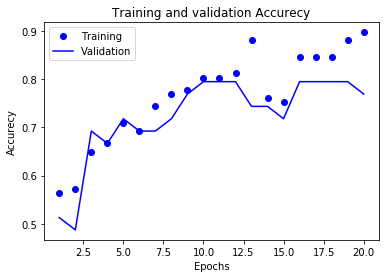

90.0 % accurecy


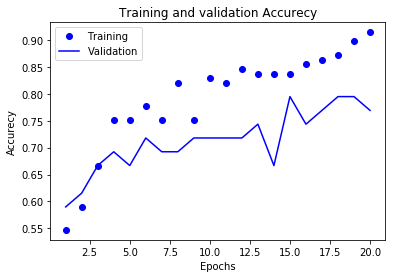

91.0 % accurecy


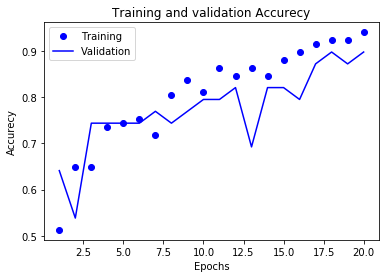

94.0 % accurecy


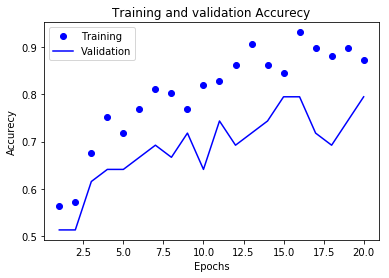

87.0 % accurecy


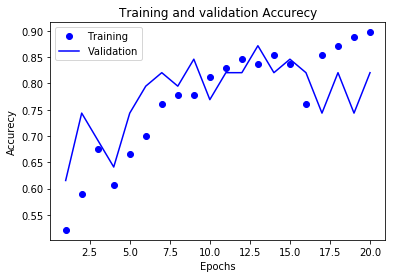

90.0 % accurecy


In [11]:

np.random.seed(seed)
def create_larger():
                            # create model
                            sonar_model = Sequential()
                            sonar_model.add(Dense(60, activation='relu', input_dim=60))
                            sonar_model.add(Dense(50, activation='relu'))
                            sonar_model.add(Dense(30, activation='relu'))
                            sonar_model.add(Dense(1,  activation='sigmoid'))
                            # Compile model
                            sonar_model.compile(loss='binary_crossentropy',
                            optimizer='adam', 
                            metrics=['accuracy'])
                            return sonar_model
for i in range(5):
                            my_model = create_larger()
                            from sklearn.model_selection import train_test_split
                            X_train, X_test, y_train, y_test       = train_test_split(X, Y)
                            # split train data into train and validation
                            X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train)
                            history = my_model.fit(X_train, y_train,epochs=20,batch_size=10, verbose=0,validation_data=(X_val, y_val))
                            import matplotlib.pyplot as plt
                            plt.plot(range(1, 21), history.history['acc'], 'bo', label='Training')
                            plt.plot(range(1,21),history.history['val_acc'], 'b', label='Validation')
                            plt.title('Training and validation Accurecy')
                            plt.xlabel('Epochs')
                            plt.ylabel('Accurecy')
                            plt.legend()
                            plt.show()
                            print(round(history.history['acc'][-1]*100), '% accurecy')

# Step 6: Tuning the Model

86.0 % accurecy


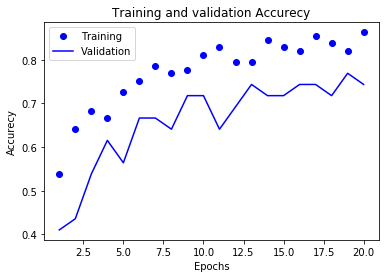

In [13]:
def step_6():
                        # create model
                        sonar_model = Sequential()
                        sonar_model.add(Dense(32, activation='relu', input_dim=60))
                        sonar_model.add(Dense(1,  activation='sigmoid'))
                        # Compile model
                        sonar_model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
                        return sonar_model
my_model = step_6()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test       = train_test_split(X, Y)
# split train data into train and validation
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train)
history = my_model.fit(X_train, y_train,epochs=20,batch_size=5, verbose=0,validation_data=(X_val, y_val))
print(round(history.history['acc'][-1]*100), '% accurecy')
import matplotlib.pyplot as plt
plt.plot(range(1, 21), history.history['acc'], 'bo', label='Training')
plt.plot(range(1,21),history.history['val_acc'], 'b', label='Validation')
plt.title('Training and validation Accurecy')
plt.xlabel('Epochs')
plt.ylabel('Accurecy')
plt.legend()
plt.show()

# Step 7: Rewriting the code using the Keras Functional API

In [14]:
import keras
from keras import layers
def kera_api_model():
    # create model
                    inputs = keras.Input(shape=(60,))
                    x = layers.Dense(60, activation='relu')(inputs)
                    x = layers.Dense(10, activation='relu')(x)
                    outputs = layers.Dense(1, activation='sigmoid')(x)

                    model = keras.Model(inputs, outputs)
                     # Compile model
                    model.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy'])
                
                    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# StandardScaler:
# [TAJARBA] har column ki har value me sy us calumn ka mean <minus> kar deta h or phir har calumn k har value ko us 
          # column ki  std sy divide kar deta h..
                        #mean_axis0 = np.mean(X[:, 0]) # pehly column ka mean ly lya
                        #std_axis0 = np.std(X[:, 0])                 # pehly column ka std ly lya
                        #X[:, 0] -= mean_axis0                                         # pehly column ki har value me sy pehly column ka mean minus kar dya
                        #X[:, 0] /= std_axis0                                                # pehly column ki har value ko pehly column k std sy divide kar dya
# Standardize features by removing the mean and scaling to unit variance.
# Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean 
#and standard deviation are then stored to be used on later data using the transform` method.
estimators.append(('mlp', KerasClassifier(build_fn=kera_api_model, epochs=20, batch_size=4, verbose=0)))
#  KerasClassifier
# Implementation of the scikit-learn classifier API for Keras.
# Returns history  object details about the training history at each epoch.
#  Constructs a new model with `build_fn` & fit the model to `(x, y)`.

# build_fn: callable function or class instance
#   https://keras.io/scikit-learn-api/
        # build_fn should construct, compile and return a Keras model, which will then be used to fit/predict. 
        # One of the following three values could be passed to build_fn:
                        # A function
                        # An instance of a class that implements the __call__ method
                        # None. This means you implement a class that inherits from either KerasClassifier or KerasRegressor. The __call__ method of the present class will then be treated as the default build_fn.

pipeline = Pipeline(estimators)
# Pipeline():
#  Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of the pipeline must be 'transforms', that is, they must implement fit and transform methods.
 # The final estimator only needs to implement fit.
 # The transformers in the pipeline can be cached using ``memory`` argument.

#The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
# For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__', as in the example below.
# A step's estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting to None.

#  steps : list
# List of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object
# an estimator.
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
# StratifiedKFold: Stratified K-Folds cross-validator
#  Provides train/test indices to split data in train/test sets.  
# This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for
# each class return:
#train : ndarray, The training set indices for that split.
# test : ndarray,  The testing set indices for that split.
results = cross_val_score(pipeline, X, Y, cv=kfold)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# # cross_val_score:
# # cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
# # estimator : estimator object implementing 'fit'. The object to use to fit the data.
# Returns: 
            # scores : array of float, shape=(len(list(cv)),)
            # Array of scores of the estimator for each run of the cross validation.

print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Smaller: 85.06% (3.05%)


# Step 8: Rewriting the code by doing Model Subclassing

In [15]:
# you should define your layers in __init__ and you should implement the model's forward pass in call.

import tensorflow as tf
import keras
class MyModel(tf.keras.Model):
    
        def __init__(self):
            
                        super(MyModel, self).__init__()
                        self.dense1 = Dense(60, activation="relu")
                        self.dense2 = Dense(10, activation='relu')
                        self.dense3 = Dense(1, activation='sigmoid')

        def call(self, inputs):

                        x = self.dense1(inputs)
                        x = self.dense2(x)
                        return self.dense3(x)
                        
                    
model = MyModel()
model.compile(loss='binary_crossentropy', optimizer='adam',   metrics=['accuracy'])
model.fit(X,Y, epochs=20, batch_size=4,verbose=False)

# Step 9: Rewriting the code without using scikit-learn
### Once you have written the model in all three API style you are required to do k-fold cross validation without using scikit-learn library.

In [19]:
import matplotlib.pyplot as plt
# Data shuffling
from random import shuffle
ind_list = [i for i in range(len(X))]
shuffle(ind_list)
X  = X[ind_list]
Y = Y[ind_list]

# Normalizing the data
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

# test data for validation
test_X = X[:25]
test_Y = Y[:25]


X = X[25:]
Y = Y[25:]

all_val_mae = []
history = []

k = 4
num_val_samples = len(X) // k
num_epochs = 20
for i in range(k):
                            val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
                            val_targets = Y[i * num_val_samples: (i + 1) * num_val_samples]
                            partial_train_data = np.concatenate([X[:i * num_val_samples],X[(i + 1) * num_val_samples:]],axis=0)
                            partial_train_targets = np.concatenate([Y[:i * num_val_samples],Y[(i + 1) * num_val_samples:]],axis=0)
                            model =kera_api_model ()
                            a = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=4,shuffle=True, verbose=0,validation_data=(val_data, val_targets))
                            history.append(a)
                            a, b = model.evaluate(test_X, test_Y, verbose=0)
                            all_val_mae.append(b)
print(np.mean(all_val_mae))

0.7300000190734863


In [ ]:
import os
os.system('spd-say "amir .......... your program has finished"')